## Research Question:

1. What is the average resting blood pressure and serum cholesterol (in mg/dl) for patients who have had heart attacks?
2. what is the difference in average resting blood pressure and serum cholesterol (in mg/dl) between patients who have not had heart attack and patients who have had attack?

## Solution:
For the first question, I will construct a 95% confidence interval for the average resting blood pressure and serum cholesterol (in mg/dl) for patients. Then for the second question, I will estimate the difference in the mean resting blood pressure and serum cholesterol (in mg/dl) between patients who have not had a heart attack and patients who have had an attack with a 95% confidence interval

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
from scipy.stats import shapiro
from scipy import stats

In [3]:
df = pd.read_csv('heart.csv')

In [35]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Question 1 

Firstly, I create data that includes patients who have had a heart attack

In [4]:
data=df[df['target']==1]

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
len(data)

165

I will check the normality of distribution (but even if there is no normal distribution large sample size allows us to apply the Central Limit Theorem and assume that the population has a normal distribution)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


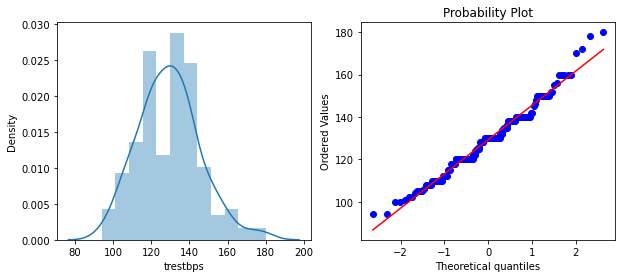

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.distplot(data['trestbps'], ax=ax[0])

stats.probplot(data['trestbps'], dist="norm", plot=plt)
plt.show()

In [10]:
print('Shapiro-Wilk test result:')
shapiro(data['trestbps'])

Shapiro-Wilk test result:


ShapiroResult(statistic=0.9786458015441895, pvalue=0.01190413162112236)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


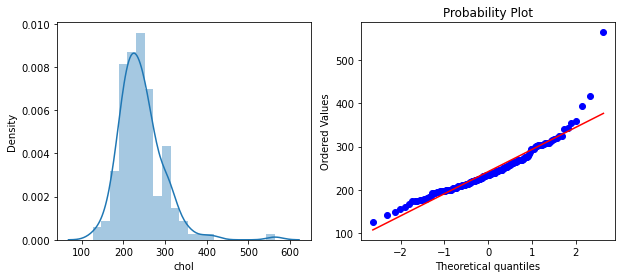

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.distplot(data['chol'], ax=ax[0])

stats.probplot(data['chol'], dist="norm", plot=plt)
plt.show()

In [12]:
print('Shapiro-Wilk test result:')
shapiro(data['chol'])

Shapiro-Wilk test result:


ShapiroResult(statistic=0.8984674215316772, pvalue=3.0788867011466436e-09)

So, apply CLT and continue

## Approach

Because I can use estimated standard error, I will apply student's two-sided t-distribution with 95% confidence level

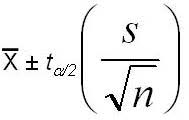



In [14]:
CI_rbp =sm.DescrStatsW(data['trestbps']).tconfint_mean(alpha=0.05, alternative='two-sided')
print(CI_rbp)

(126.81748087618438, 131.78857972987626)


In [15]:
CI_chol =sm.DescrStatsW(data['chol']).tconfint_mean(alpha=0.05, alternative='two-sided')
print(CI_chol)

(233.9982997658203, 250.46230629478575)


## Alternative solution with formula:

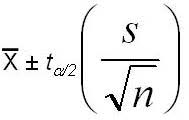
 
$$ \bar {x} - best \ estimate \ (mean \ of \ sample)$$
$$tα/2* \frac {S} {\sqrt n}  - margin\ of \ error$$
$$(1-α ) * 100 – level \ of \ confidence$$
$$S - standard \ deviation \ of \ sample $$
$$n -sample \ size $$
$$\frac {S} {\sqrt n}  - estimated \ standard \ error \ of \ sample \ mean$$

In [7]:
# find t critical value
stats.t.ppf(q=0.025,df=len(data['trestbps'])-1)

-1.9745345758522659

In [8]:
best_estimate_rbp = data['trestbps'].mean()
s_rbp = np.std(data['trestbps'])
n_rbp = len(data['trestbps'])

lower_limit = best_estimate_rbp - 1.97 * (s_rbp / np.sqrt(n_rbp))
upper_limit = best_estimate_rbp + 1.97 * (s_rbp / np.sqrt(n_rbp))

CI_rbp_ = (lower_limit, upper_limit)
print(CI_rbp_)

(126.83071510352106, 131.77534550253955)


In [9]:
best_estimate_chol = data['chol'].mean()
s_chol = np.std(data['chol'])
n_chol = len(data['chol'])

lower_limit = best_estimate_chol - 1.97 * (s_chol / np.sqrt(n_chol))
upper_limit = best_estimate_chol + 1.97 * (s_chol / np.sqrt(n_chol))

CI_chol_ = (lower_limit, upper_limit)
print(CI_chol_)

(234.0421308003038, 250.41847526030224)


## Conclusion

1. With 95% confidence, average resting blood pressure for patients who have had heart attacks is estimated between 127 and 132 
2. With 95% confidence. average serum cholesterol (in mg/dl) for patients who have had heart attacks is estimated between 234 and 250 

# Question 2

In [18]:
# create data that includes patients who have had a heart attack
data2 = df[df['target'] ==0]

In [21]:
len(data2)

138

# Approaches:

### 1. Pooled Approach:
The variance of the two populations are assumed to be equal

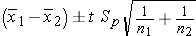

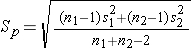

### 2. Unpooled Approach:
The variance of the two populations are not equal

Welch's t interval is used 

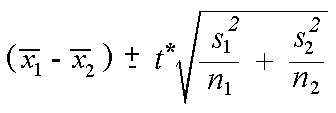

In [30]:
# for patients who have had heart attack
s1_bp = np.std(data['trestbps'])
s1_chol = np.std(data['chol'])

# for patients who have not had heart attack
s2_bp = np.std(data2['trestbps'])
s2_chol = np.std(data2['chol'])

print('standard deviations for blood pressure\n', (s1_bp, s2_bp ))
print('standard deviations for cholesterol\n', (s1_chol, s2_chol ))

standard deviations for blood pressure
 (16.120539972317363, 18.66195845970553)
standard deviations for cholesterol
 (53.39034349670409, 49.275104432402735)


Standard deviations are not equal. The unpooled approach should apply

In [42]:
# patients who have had heart attack
mean1_bp = data['trestbps'].mean()
n1_bp = len(data['trestbps'])
mean1_chol = data['chol'].mean()
n1_chol = len(data['chol'])

# patients who have not had heart attack
mean2_bp = data2['trestbps'].mean()
n2_bp = len(data2['trestbps'])
mean2_chol = data2['chol'].mean()
n2_chol = len(data2['chol'])

# construct confidence interval for difference in means for blood pressure
lower_limit_bp = (mean1_bp - mean2_bp) - 1.96 * (np.sqrt((s1_bp**2 /n1_bp) +(s2_bp**2/n2_bp)))
upper_limit_bp = (mean1_bp - mean2_bp) + 1.96 * (np.sqrt((s1_bp**2 /n1_bp) +(s2_bp**2/n2_bp)))

print('confidence interval for difference in means for blood pressure:\n', (lower_limit_bp, upper_limit_bp))
                                                
# construct confidence interval for difference in means for serum cholesterol
lower_limit_chol = (mean1_chol - mean2_chol) - 1.96 * (np.sqrt((s1_chol**2 /n1_chol) +(s2_chol**2/n2_chol)))
upper_limit_chol = (mean1_chol - mean2_chol) + 1.96 * (np.sqrt((s1_chol**2 /n1_chol) +(s2_chol**2/n2_chol)))
                                                       
print('confidence interval for difference in means for serum cholesterol:\n', (lower_limit_chol, upper_limit_chol))

confidence interval for difference in means for blood pressure:
 (-9.063572658494515, -1.1274681847202364)
confidence interval for difference in means for serum cholesterol:
 (-20.430680881977985, 2.7173738991057714)


## Conclusion

1. With 95% confidence, difference in average resting blood pressure between patients who have not a had heart attack and patients who have had attack is estimated between 1 and 9
2. With 95% confidence, difference in average serum cholesterol (in mg/dl) between patients who have not a had heart attack and patients who have had attack is estimated between 2 and 20
3. It seems that the resting blood pressure and serum cholesterol of patients who have not had a heart attack are higher than those who have had a heart attack.